_____
# **K-NEAREST NEIGHBORS**
________

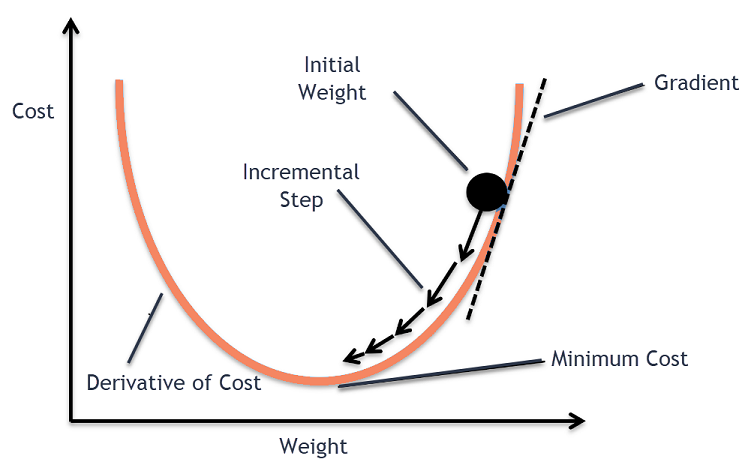

K-Nearest Neighbors (K-NN) is a straightforward and easy-to-understand supervised learning technique that is applied to regression and classification problems.  According to the majority class (for classification) or average (for regression) of those neighbors, the algorithm determines which data points are the nearest to a particular data point.


### The Math Behind K-NN

The K-NN algorithm's core concept relies on calculating the distance between data points. The most commonly used distance metric is Euclidean Distance, defined as:

$$
d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
$$

Where:
- \( x \) and \( y \) are two points in an n-dimensional space.
- \( x_i \) and \( y_i \) are the values of the \(i\)-th feature of the points.



## **Task For this Notebook**

For this Notebook, the task will be to classify different species of iris flowers based on their features (sepal length, sepal width, petal length, and petal width). The dataset is the Iris dataset from UCI's machine learning repository.


### Required Libraries

The libraries required to achieve the task of this notebook are:

- **numpy** → Efficient numerical operations for handling arrays and mathematical computations, especially for vectorized operations.
- **pandas** → Provides powerful data manipulation and analysis tools, useful for handling datasets (though not directly used in the code, it's helpful for preprocessing).
- **sklearn.datasets** → Load datasets such as the Iris dataset using `load_iris()`.
- **sklearn.model_selection** → Split the dataset into training and testing sets using `train_test_split()`.
- **sklearn.preprocessing** → Standardize features to ensure fair distance calculations using `StandardScaler()`.
- **sklearn.neighbors** → Implements the K-Nearest Neighbors algorithm through `KNeighborsClassifier()`.
- **sklearn.metrics** → Evaluate model performance using metrics like `accuracy_score()`.
- **matplotlib.pyplot** → Create visualizations, such as plotting the decision boundary and data points using `plt.plot()` and other functions.



### Import Libraries

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

### Load Data



In [4]:

iris = load_iris()

# Convert the data into a pandas DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Data Types and Columns (Data Exploration)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


### Data Cleaning

In [6]:
# Number of missing values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [7]:
# Number of duplicates


duplicates = df.duplicated().sum()
print(f"Number of duplicates: {duplicates}")

Number of duplicates: 1


Duplicate was found, hence it will be dropped

In [8]:
df = df.drop_duplicates()

### Listing the columns of the data set

The columns in this data set are as follows;

In [9]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

### Initializing the Features and Target

In [10]:
X = iris.data  # features (sepal length, sepal width, petal length, petal width)
y = iris.target 

### Split Dataset to Train and Test

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Standardize the data 

Important for K-NN to work well


In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### K-NN classifier

In [13]:
k = 5  #  number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

### Train the Model

In [14]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Make predictions

In [15]:
y_pred = knn.predict(X_test)

### Model Evaluation

In [16]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of K-NN classifier with k={k}: {accuracy:.2f}")

Accuracy of K-NN classifier with k=5: 1.00


The accuracy of **1.00** means that the model correctly predicted all the test set labels, i.e., 100% accuracy.

- **Accuracy Formula:**
  $$ \text{Accuracy} = \frac{\text{Correct Predictions}}{\text{Total Predictions}} $$

### Why 1.00 accuracy?
1. **Simple Dataset:** The Iris dataset is well-behaved and easy to classify.
2. **Good choice of k:** k=5 might give the right balance for correct predictions.
3. **Standardized features:** Ensures distance calculations are fair across all features.


### Model Visualisation

In this the model will be retrained using only tewo features

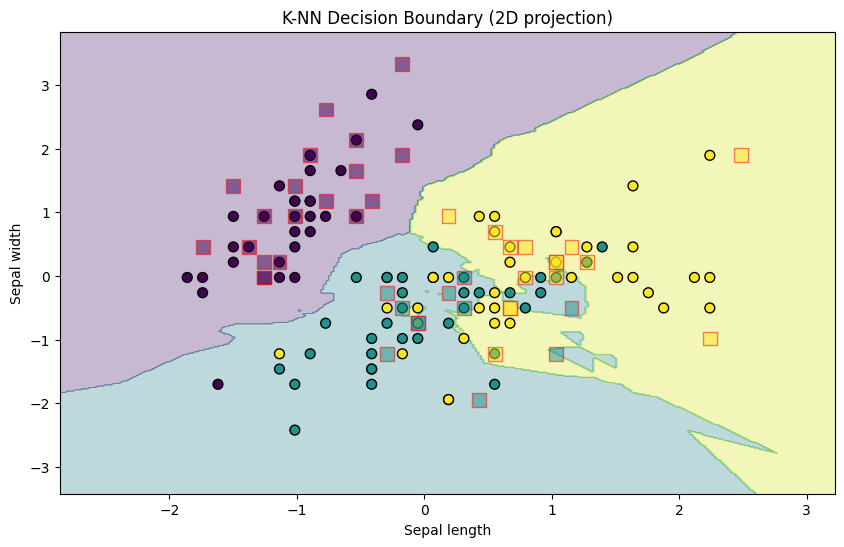

In [17]:
# For simplicity, only two features for visualization
X_train_2d = X_train[:, :2]  # Sepal length and sepal width
X_test_2d = X_test[:, :2]

# Train the model  using only two features
knn.fit(X_train_2d, y_train)
y_pred_2d = knn.predict(X_test_2d)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
h = .02  # Step size in the mesh
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the points and the decision boundary
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolors='k', marker='o', s=50)
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_pred_2d, edgecolors='r', marker='s', s=100, alpha=0.5)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('K-NN Decision Boundary (2D projection)')
plt.show()

### Key Observations of the Graph

**1. Decision Boundaries**

  - The graph is divided into colored regions, each representing a different class predicted by the K-NN model.

  - The boundaries between these regions indicate where the classification changes based on feature values.

**2.  Data Points & Classes**

  - Points are plotted in different colors and shapes, corresponding to different species in the Iris dataset.

**3. Misclassified Points** 

- Some points have a square around them—these are misclassifications where the model incorrectly predicted the class.

- The square’s color represents the true class, while the circle’s color inside represents the predicted class.




## **Conclusion of Notebook**

In this notebook, we classified iris species according to their attributes using the **K-Nearest Neighbors (K-NN)** algorithm.  Among the crucial actions were:.



1. **Data Preprocessing:** We standardized the features to ensure accurate distance calculations.
2. **Model Training:** We trained a K-NN classifier with k=5 on the Iris dataset.
3. **Evaluation:** The model achieved a perfect accuracy of **1.00**, indicating that it correctly predicted all test samples.

From the visualizations:
- The **decision boundaries** clearly separated the different iris species, demonstrating how the K-NN model makes predictions based on proximity.
- Data points were correctly classified with minimal misclassifications, confirming the effectiveness of the model.

### Final Thoughts:
- The **K-NN** algorithm performed exceptionally well on the Iris dataset, achieving perfect accuracy. 
- While this result is promising, it’s important to remember that such performance might vary with more complex or noisy datasets.
